<a href="https://colab.research.google.com/github/mahalakruth/SAJRA/blob/main/speech%20to%20text19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline
# Initialize the speech recognition pipeline
speech_recognition_pipeline = pipeline("automatic-speech-recognition", model="facebook/seamless-m4t-v2-large")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/211k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.24G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/9.91M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.17M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

In [4]:
# Provide the path to the audio file you want to transcribe
audio_file_path = "/content/ruth.mp3"

In [5]:
# Transcribe speech
transcription_result = speech_recognition_pipeline(audio_file_path)

You must either specify a `tgt_lang` or pass a correct `text_decoder_input_ids` to get
                a correct generation, otherwise the generation will probably make no sense.


In [6]:
transcription_result
# Access the transcribed text from the result
transcribed_text = transcription_result['text']
transcribed_text

"I love ice cream and biryani, my name is Ruth, I'm a computer science engineering graduate in a university."

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import wave
import librosa

In [8]:
# Load audio file
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)
import soundfile as sf


In [9]:
# Load audio file
audio_signal, sample_rate = sf.read(audio_file_path)
# Get audio signal and sample rate
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)

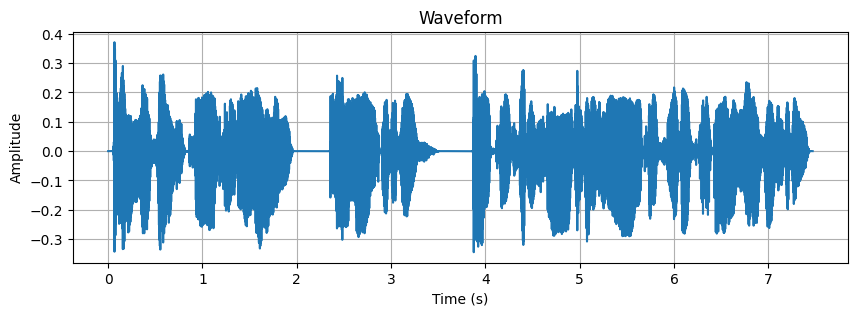

In [10]:
# Plot waveform
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal)), audio_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid()
plt.show()

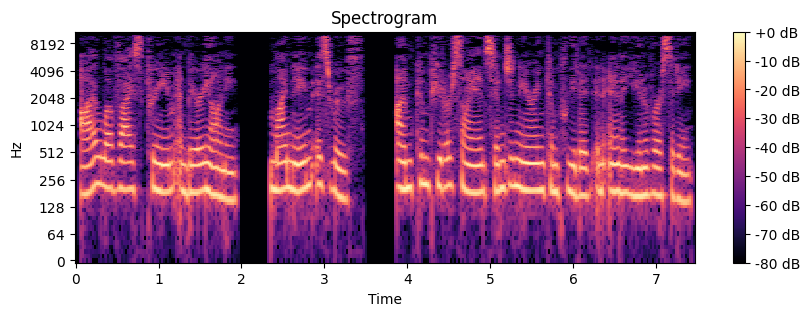

In [11]:
# Plot spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()